In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
data = loadmat('../data/ex7data1.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [3]:
dataset = data['X']
dataset.shape

(300, 2)

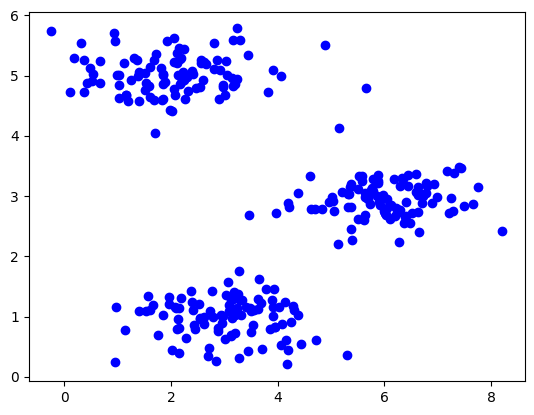

In [4]:
def show_cluster(dataset, cluster, centroids=None):
    # dataset: 数据
    # centroids: 聚类中心点的坐标
    # cluster: 每个样本所属聚类
    colors = ['blue', 'red', 'green', 'purple']
    markers = ['o', '^', 's', 'd']

    k = len(np.unique(cluster))
    for i in range(k):
        plt.scatter(dataset[cluster == i, 0], dataset[cluster == i, 1],
                   color=colors[i], marker=markers[i])
    
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                   color=colors[i], marker='+', s=150)

    plt.show()

# 初始时不区分类别
show_cluster(dataset, np.zeros(len(dataset), dtype=int))

#### k-mean 算法

In [5]:
def random_init(dataset, K):
    idx = np.random.choice(np.arange(len(dataset)), size=K, replace=False)
    return dataset[idx]

In [6]:
def Kmeans(datset, K, init_cent):
    # dataset: 数据集
    # K：目标聚类数
    # init_cent: 初始化中心点的函数
    centroids = init_cent(dataset, K)
    cluster = np.zeros(len(dataset), dtype=int)
    changed = True
    itr = 0
    while changed:
        changed = False
        loss = 0
        for i, data in enumerate(dataset):
            dis = np.sum((centroids - data) ** 2, axis=-1)
            k = np.argmin(dis)
            if cluster[i] != k:
                cluster[i] = k
                changed = True
            loss += np.sum((data - centroids[k]) ** 2)
        print(f'Iteration {itr}, Loss {loss:.3f}')
        show_cluster(dataset, cluster, centroids)
        for i in range(K):
            centroids[i] = np.mean(dataset[cluster == i], axis=0)
        itr += 1
    return centroids, cluster

Iteration 0, Loss 1403.259


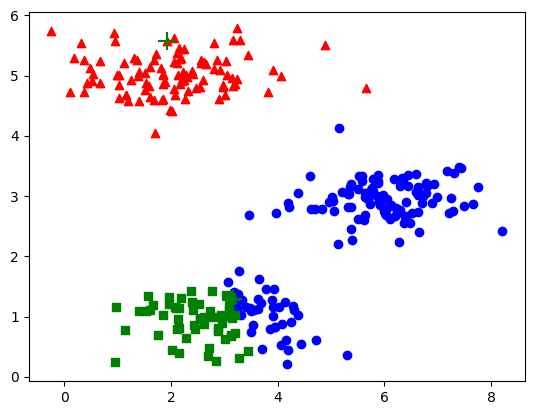

Iteration 1, Loss 376.219


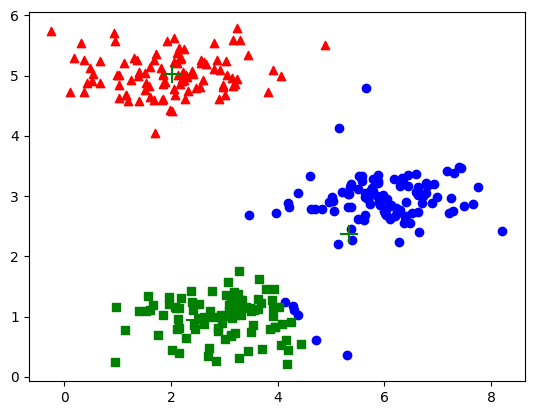

Iteration 2, Loss 271.308


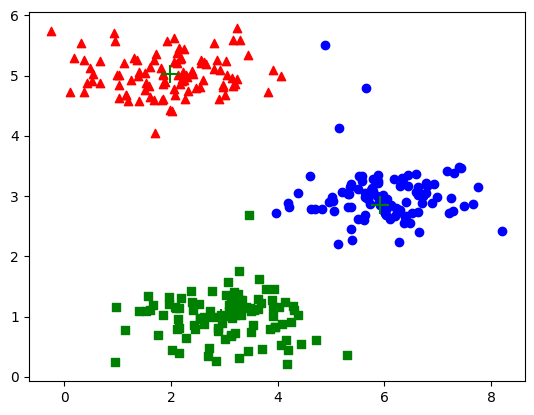

Iteration 3, Loss 266.739


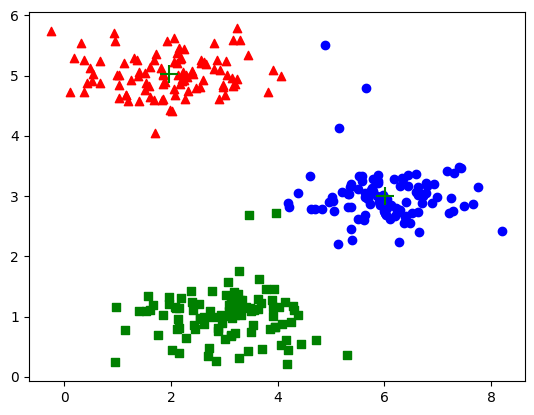

Iteration 4, Loss 266.659


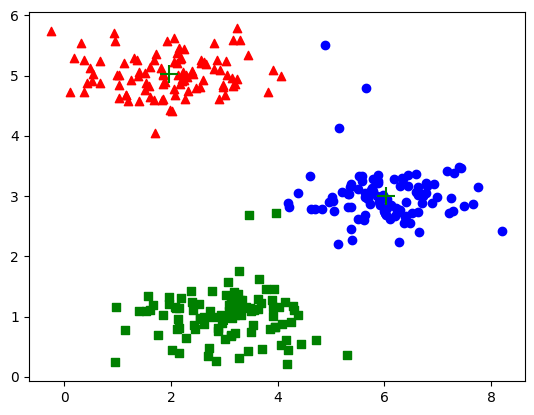

In [7]:
cent, cluster = Kmeans(dataset, 3, random_init)

#### k-means++算法

In [8]:
def kmeanspp_init(dataset, K):
    # 随机第一个中心点
    idx = np.random.choice(np.arange(len(dataset)))
    centroids = dataset[idx][None]
    for k in range(1, K):
        d = []
        # 计算每个点到当前中心点的距离
        for data in dataset:
            dis = np.sum((centroids - data) ** 2, axis=-1)
            # 取最短距离的平方
            d.append(np.min(dis) ** 2)
        # 归一化
        d = np.array(d)
        d /= np.sum(d)
        # 按概率选取下一个中心点
        cent_id = np.random.choice(np.arange(len(dataset)), p=d)
        cent = dataset[cent_id]
        centroids = np.concatenate([centroids, cent[None]], axis=0)

    return centroids

In [9]:
def Kmeans(datset, K, init_cent):
    # dataset: 数据集
    # K：目标聚类数
    # init_cent: 初始化中心点的函数
    centroids = init_cent(dataset, K)
    cluster = np.zeros(len(dataset), dtype=int)
    changed = True
    itr = 0
    while changed:
        changed = False
        loss = 0
        for i, data in enumerate(dataset):
            dis = np.sum((centroids - data) ** 2, axis=-1)
            k = np.argmin(dis)
            if cluster[i] != k:
                cluster[i] = k
                changed = True
            loss += np.sum((data - centroids[k]) ** 2)
        for i in range(K):
            centroids[i] = np.mean(dataset[cluster == i], axis=0)
        itr += 1
    return centroids, cluster

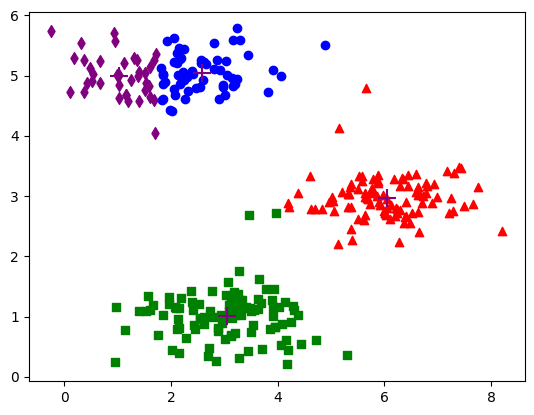

In [10]:
cent, cluster = Kmeans(dataset, 4, kmeanspp_init)
show_cluster(dataset, cluster, cent)